# Project              :  K -MEAN CLUSTERING
# Author               :  Fateh Muhammad
# DataSet             :  Mall_Customer DataSet (Available on Kaggle)
# Description       : This algorithm have been Implemented from Scratch

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from itertools import islice
import math
import random
from scipy.spatial import distance
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df= pd.read_csv("Mall_Customers.csv")

In [3]:
df.tail()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
# keeping only the desired column
col = ['Genre', 'Age', 'AnnualIncome', 'SpendingScore']
customer_features = df[col]

In [5]:
customer_features.head()

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
customer_features = pd.get_dummies(customer_features, 
                                     columns= ['Genre'])

In [7]:
customer_features['cluster'] = 0

In [8]:
customer_features

,Age,AnnualIncome,SpendingScore,Genre_Female,Genre_Male,cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,0
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,0
196,45,126,28,1,0,0
197,32,126,74,0,1,0
198,32,137,18,0,1,0


# This function initializes centroids from within the Data Set

In [9]:
def initialize_centroids(customer_features, k):
        centroids = customer_features.sample(n = k)
        return centroids

# This function will calculate the Euclidean distance of Data Points from Centroids and return that distance

In [10]:
def euclidean_distance(customer_features, centroids):
    labels = {}
    euclidean_dist = {}
    for point in customer_features.itertuples():
        for centroid in centroids.itertuples():
            euclidean_dist[(point[0],centroid[0])] = distance.euclidean(list(point)[1:], list(centroid)[1:])
    return euclidean_dist

# This function will use selected centroids and Euclidean distance to check, Data Point belongs to which cluster, and assigns the label of that cluster.

In [11]:
def label_cluster(customer_features, centroids, euclidean_dist):
    i,j = 0,0
    distances = []
    label = []
    for point in range(len(euclidean_dist)):
        if(len(distances) < 4):
            distances.append(euclidean_dist[list(euclidean_dist.keys())[point]])
            if(len(distances) == 3):
                label.append(distances.index(min(distances)))
                distances.clear()
                i = 0
            i += 1
    customer_features["cluster"] = pd.DataFrame(label)
    return customer_features

# This function is to visualize the clusters, made by this algorithm. 

In [12]:
def cluster_visualization(clusters):
    
    LABEL_COLOR_MAP = {
                       0 : 'r',
                       1 : 'y',
                       2 : 'g'
                       }
    
    label_color = [LABEL_COLOR_MAP[m] for m in clusters['cluster']]
    label_color
    plt.scatter(clusters.values[:,0],clusters.values[:,1],clusters.values[:,2], color = label_color)
    plt.pause(0.01)
    plt.show()

# This function will check, Once algorithm is done with clustering of Data Points, it'll start updating centroids and make clusters agian and again, untill algorithm will converge. 

In [13]:
def update_centroids(clusters, centroids):
    
    print("Centroids")
    print(centroids)
    cluster_visualization(clusters)
    new_centroids = pd.DataFrame()
    
    cluster1 =  clusters[clusters["cluster"] == 0]
    cluster2 =  clusters[clusters["cluster"] == 1]
    cluster3 =  clusters[clusters["cluster"] == 2]
    
    centroid1 = cluster1.mean(axis=0).astype(int)
    centroid2 = cluster2.mean(axis=0).astype(int)
    centroid3 = cluster3.mean(axis=0).astype(int)
    
    new_centroids = pd.concat([centroid1, centroid2, centroid3], ignore_index = True, axis = 1).T
    
    if(([number for number in list(centroid1)] == list(centroids.iloc[0])) and ([number for number in list(centroid2)] == list(centroids.iloc[1])) and ([number for number in list(centroid3)] == list(centroids.iloc[2]))):
        return clusters
    
    else:
        euclidean_dist = euclidean_distance(clusters, new_centroids)
        new_clusters = label_cluster(clusters, new_centroids, euclidean_dist)
        update_centroids(new_clusters, new_centroids)

# Initialize Centroids (from within a DataSet)

In [14]:
centroids = initialize_centroids(customer_features, 3)
centroids

,Age,AnnualIncome,SpendingScore,Genre_Female,Genre_Male,cluster
74,59,54,47,0,1,0
119,50,67,57,1,0,0
7,23,18,94,1,0,0


# Euclidean Distance of Data Points from Centroids

In [15]:
euclidean_dist = euclidean_distance(customer_features, centroids)

# After selecting some random centroids and calculating Euclidean Distance, Now calcualte labels of DataPoints.

In [16]:
clusters = label_cluster(customer_features, centroids, euclidean_dist)
clusters

,Age,AnnualIncome,SpendingScore,Genre_Female,Genre_Male,cluster
0,19,15,39,0,1,2
1,21,15,81,0,1,2
2,20,16,6,1,0,0
3,23,16,77,1,0,2
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,1
196,45,126,28,1,0,1
197,32,126,74,0,1,1
198,32,137,18,0,1,1


# Plot Cluster

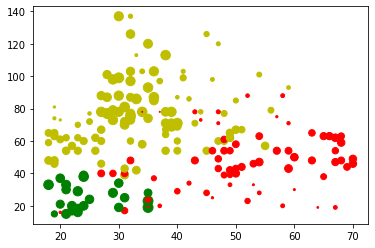

In [17]:
cluster_visualization(clusters)

# Now, calculate mean of DataPoints in separate clusters, and update centroids on the basis of mean. Plot cluster again and again untill centroids and clusters stop updating, and the algorithm has converged.

Centroids
     Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
74    59            54             47             0           1        0
119   50            67             57             1           0        0
7     23            18             94             1           0        0


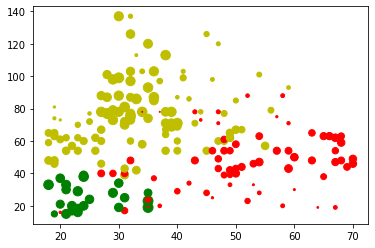

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   51            47             34             0           0        0
1   33            76             54             0           0        1
2   25            25             77             0           0        2


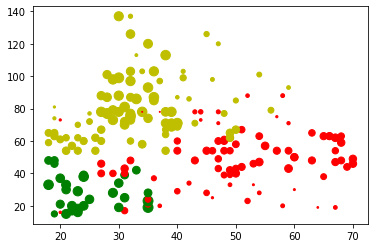

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   49            49             35             0           0        0
1   33            80             56             0           0        1
2   24            28             74             0           0        2


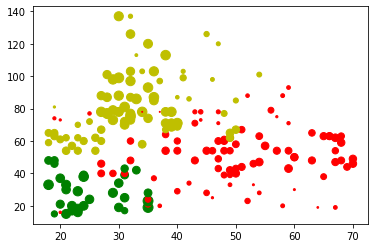

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   49            51             34             0           0        0
1   32            81             58             0           0        1
2   25            28             72             0           0        2


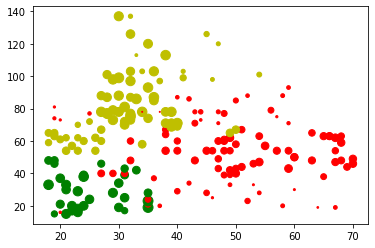

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   48            54             33             0           0        0
1   31            82             62             0           0        1
2   25            29             71             0           0        2


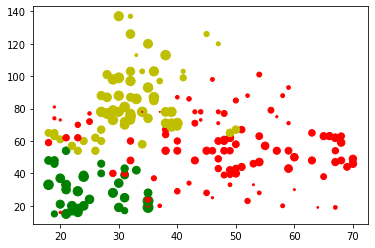

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   47            56             33             0           0        0
1   32            83             66             0           0        1
2   25            30             70             0           0        2


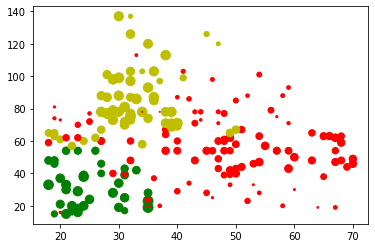

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   47            57             33             0           0        0
1   32            84             69             0           0        1
2   25            31             69             0           0        2


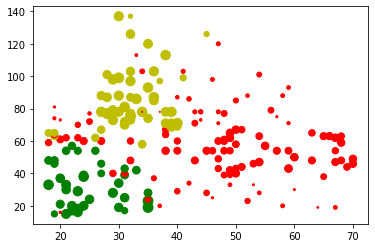

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   46            58             33             0           0        0
1   32            85             74             0           0        1
2   25            32             68             0           0        2


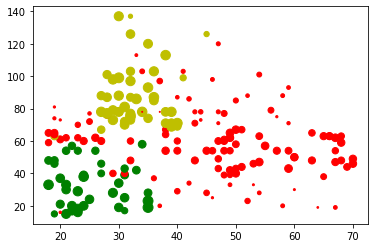

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   45            59             34             0           0        0
1   32            87             76             0           0        1
2   25            32             67             0           0        2


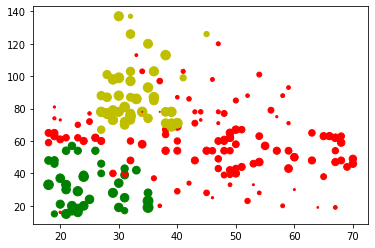

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   45            59             34             0           0        0
1   33            88             77             0           0        1
2   25            31             67             0           0        2


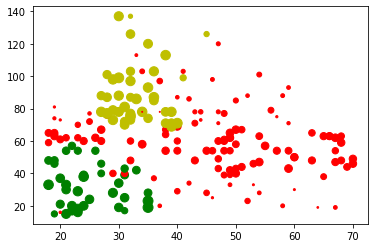

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   45            59             34             0           0        0
1   33            88             78             0           0        1
2   25            31             67             0           0        2


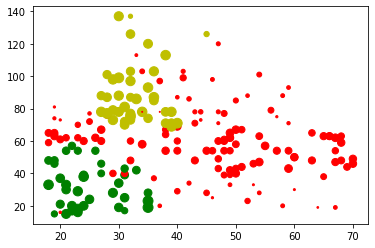

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   45            60             34             0           0        0
1   32            88             79             0           0        1
2   25            31             67             0           0        2


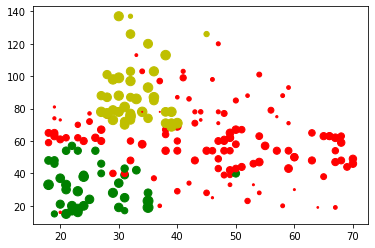

Centroids
   Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male  cluster
0   44            60             34             0           0        0
1   32            88             79             0           0        1
2   26            32             67             0           0        2


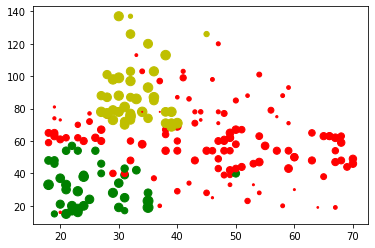

In [18]:
final_clustering = update_centroids(clusters, centroids)